In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UN_city_pop_projections_long.csv')

In [3]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
0,0,Africa,12,Algeria,20009,Annaba,Urban Agglomeration,36.900000,7.766670,1950,99.741
1,1,Africa,12,Algeria,20011,Batna,City Proper,35.555970,6.174140,1950,13.046
2,2,Africa,12,Algeria,20015,Blida,Urban Agglomeration,36.480781,2.831943,1950,33.970
3,3,Africa,12,Algeria,20006,El Djazaïr (Algiers),Urban Agglomeration,36.752500,3.041970,1950,516.450
4,4,Africa,12,Algeria,20020,El Djelfa,Urban Agglomeration,34.672790,3.263000,1950,10.450
...,...,...,...,...,...,...,...,...,...,...,...
19001,19001,Africa,894,Zambia,23277,Lusaka,Urban Agglomeration,-15.413374,28.277148,2035,5182.669
19002,19002,Africa,894,Zambia,23279,Ndola,City Proper,-12.958670,28.636590,2035,925.726
19003,19003,Africa,716,Zimbabwe,22510,Bulawayo,City Proper,-20.150000,28.583330,2035,874.479
19004,19004,Africa,716,Zimbabwe,22511,Chitungwiza,City Proper,-18.012740,31.075550,2035,552.027


In [4]:
df.Country_or_area.unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
       'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania',
       'Zambia', 'Zimbabwe'], dtype=object)

In [5]:
df = df[df['Country_or_area']=='Egypt']

In [6]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
54,54,Africa,818,Egypt,22814,Al-Fayyum,City Proper,29.309950,30.841800,1950,62.905
55,55,Africa,818,Egypt,22804,Al-Iskandariyah (Alexandria),City Proper,31.192471,29.904596,1950,1037.462
56,56,Africa,818,Egypt,22815,Al-Ismailiyah,City Proper,30.604270,32.272250,1950,77.633
57,57,Africa,818,Egypt,22806,Al-Mahallah al-Kubra,City Proper,30.974500,31.164990,1950,128.518
58,58,Africa,818,Egypt,22819,Al-Mansurah,City Proper,31.036370,31.380690,1950,112.169
...,...,...,...,...,...,...,...,...,...,...,...
18847,18847,Africa,818,Egypt,22807,Asyut,City Proper,27.180960,31.183680,2035,611.292
18848,18848,Africa,818,Egypt,22829,Az-Zaqazig,City Proper,30.587500,31.501944,2035,475.146
18849,18849,Africa,818,Egypt,22823,Bur Sa'id,City Proper,31.256540,32.284120,2035,997.059
18850,18850,Africa,818,Egypt,22816,Kafr-ad-Dawwar,City Proper,31.133850,30.128430,2035,461.678


In [7]:
df = df.reset_index()

In [8]:
df = df.drop(columns=['index','Unnamed: 0','Region','Country_Code','City_Code','Country_or_area','City_Definition'])

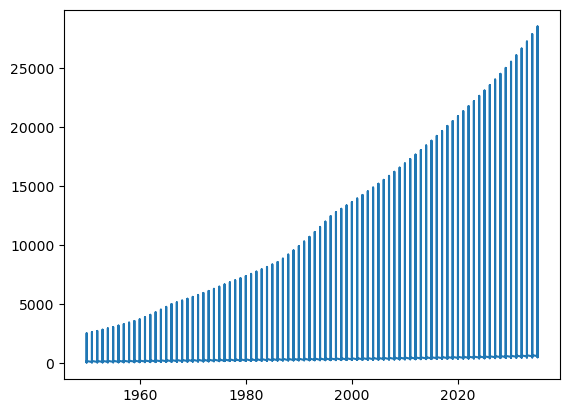

In [9]:
from matplotlib import pyplot as plt
plt.plot(df['year'],df['population'])

In [10]:
train = df[(df['year'] >= 1950) & (df['year'] < 2018)]
test = df[(df['year'] >= 2018) & (df['year'] <= 2035)]

In [11]:
x_train = train[['Latitude','Longitude','year','City']]
y_train = train[['population']]

In [12]:
x_test = test[['Latitude','Longitude','year','City']]
y_test = test[['population']]

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(884, 4)
(884, 1)
(234, 4)
(234, 1)


In [15]:
from sklearn.preprocessing import LabelEncoder
encoding  = LabelEncoder()
x_train['City'] = encoding.fit_transform(x_train[['City']])
x_test['City'] = encoding.fit_transform(x_test[['City']])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_288\1267850018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['City'] = encoding.fit_transform(x_train[['City']])
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_288\126

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
predict_test = reg.predict(x_test)
predict_train = reg.predict(x_train)

In [20]:
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
mean_squared_error(y_test,predict_test)

38844812.13870463

In [22]:
mean_squared_error(y_train,predict_train)

7481300.127365268

In [23]:
r2_score(y_test,predict_test)

0.03167912122191896

In [24]:
r2_score(y_train,predict_train)

0.08368223419702714

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
gbr = GradientBoostingRegressor()

In [27]:
gbr.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [29]:
prediction_train = gbr.predict(x_train)

In [30]:
prediction_test = gbr.predict(x_test)

In [31]:
r2_score(y_test,prediction_test)

0.9423341643711375

In [33]:
r2_score(y_train,prediction_train)

0.9993291240907487

In [38]:
y_test = y_test.values

In [42]:
final_data = pd.DataFrame(zip(y_test, prediction_test),columns=['Actual', 'predicted'])

In [43]:
final_data['Actual'] = final_data['Actual'].astype(str).str.replace('\[|\]', '')
final_data['Actual'] = pd.to_numeric(final_data['Actual'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_288\4214225479.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_data['Actual'] = final_data['Actual'].astype(str).str.replace('\[|\]', '')


In [44]:
final_data

,Actual,predicted
0,395.086,446.392433
1,5086.240,4847.317572
2,344.788,380.139697
3,506.405,517.243025
4,537.804,533.602796
...,...,...
229,611.292,457.459735
230,475.146,369.013673
231,997.059,671.803395
232,461.678,366.276158
